In [172]:
from pydub import AudioSegment
from pydub.playback import play
from IPython.display import Audio
import sounddevice as sd
import librosa
import soundfile as sf
import io

In [11]:
newAudio = AudioSegment.from_wav("counting_sample.wav")

In [ ]:
raw = wave.open('counting_sample.wav', 'r')
# reads all the frames
# -1 indicates all or max frames
signal = raw.readframes(-1)
signal = np.frombuffer(signal, dtype ="int16")
f_rate = raw.getframerate()

In [41]:
import wave
import numpy as np
import matplotlib.pyplot as plt


def draw_signal(signal, f_rate):
    time = np.linspace(
            0, # start
            len(signal) / f_rate,
            num = len(signal)
    )

    plt.figure(1)

    # title of the plot
    plt.title("Sound Wave")

    # label of x-axis
    plt.xlabel("Time")

    # actual plotting
    plt.plot(time, signal)

    # shows the plot
    # in new window
    plt.show()

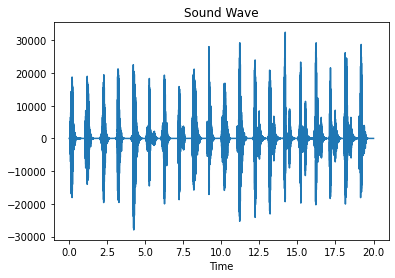

In [43]:
draw_signal(signal, f_rate*2)

In [40]:
t0 = 0
t1 = 1
one = signal[f_rate*t0:f_rate*t1]
Audio(one, rate = f_rate*2)

In [101]:
sf.write("one.wav", one, f_rate*2, subtype='PCM_24')

In [47]:
t0 = 2
t1 = 3
two = signal[f_rate*t0:f_rate*t1]
Audio(two, rate = f_rate*2)

In [100]:
sf.write("two.wav", two, f_rate*2, subtype='PCM_24')

In [102]:
t0 = 4
t1 = 5.3
three = signal[int(f_rate*t0):int(f_rate*t1)]
Audio(three, rate = f_rate*2)

In [103]:
sf.write("three.wav", three, f_rate*2, subtype='PCM_24')

In [105]:
t0 = 6
t1 = 7.3
four = signal[int(f_rate*t0):int(f_rate*t1)]
Audio(four, rate = f_rate*2)

In [106]:
sf.write("four.wav", four, f_rate*2, subtype='PCM_24')

In [76]:
t0 = 8
t1 = 9
five = signal[int(f_rate*t0):int(f_rate*t1)]
Audio(five, rate = f_rate*2)

In [97]:
sf.write("five.wav", five, f_rate*2, subtype='PCM_24')

In [89]:
t0 = 10
t1 = 11.7
six = signal[int(f_rate*t0):int(f_rate*t1)]
Audio(six, rate = f_rate*2)

In [96]:
sf.write("six.wav", six, f_rate*2, subtype='PCM_24')

In [108]:
t0 = 12
t1 = 13.5
seven = signal[int(f_rate*t0):int(f_rate*t1)]
Audio(seven, rate = f_rate*2)

In [109]:
sf.write("seven.wav", seven, f_rate*2, subtype='PCM_24')

In [110]:
t0 = 14
t1 = 15.2
eight = signal[int(f_rate*t0):int(f_rate*t1)]
Audio(eight, rate = f_rate*2)

In [111]:
sf.write("eight.wav", eight, f_rate*2, subtype='PCM_24')

In [92]:
t0 = 16
t1 = 17
nine = signal[int(f_rate*t0):int(f_rate*t1)]
Audio(nine, rate = f_rate*2)

In [94]:
sf.write("nine.wav", nine, f_rate*2, subtype='PCM_24')

In [18]:
Audio("counting_sample.wav", autoplay=True)

# read all files

In [157]:
file_paths = ["one.wav", "two.wav", "three.wav", "four.wav", "five.wav", "six.wav", "seven.wav", "eight.wav", "nine.wav"]

audio_data = []
sample_rate = []
time_between_each_number = 1.5
size = int(22050*time_between_each_number)

for file_path in file_paths:
    data, sr = librosa.load(file_path)
    audio_data.append(np.pad(data, (0, size - len(data)),"constant"))
    sample_rate.append(sr)

In [163]:
nback_array = [0, 1, 5, 4, 1, 4, 3, 6, 8, 4, 8, 6, 2, 5, 2, 6, 8, 3, 1, 3, 6, 3, 2, 7, 3, 4]

In [162]:
np.array(nback)+1

array([1, 2, 6, 5, 2, 5, 4, 7, 9, 5, 9, 7, 3, 6, 3, 7, 9, 4, 2, 4, 7, 4,
       3, 8, 4, 5])

In [168]:
def get_nback_press_loc(nback_array, step = 2):
    ret = []
    for i, n in enumerate(nback_array):
        if i < step:
            pass
        else:
            if n == nback_array[i-2]:
                print(f"{i+1} press. N back number is ")
                ret.append(i)
    return ret

In [169]:
get_nback_press_loc(nback_array)

6 press
11 press
15 press
20 press
22 press


[5, 10, 14, 19, 21]

In [159]:
audio_gen = audio_data[nback[0]]
for n in nback[1:]:
    audio_gen = np.append(audio_gen, audio_data[n])

In [176]:
for n in nback_array:
    sd.play(audio_data[n], sample_rate[n], blocking=True)
    

In [160]:
Audio(audio_gen, rate = sample_rate[0])